In [2]:
from main_functions import *

inv_gamma = 3
nb_bootstrap = 100
size_sample = 10000
bootstrap_size = 0

sample = get_frechet_sample(inv_gamma, size_sample)
k0_opti = int(de_haan_1998(sample))

get_bootstrap_variance_kulik(sample,
                                 nb_bootstrap,
                                 bootstrap_size,
                                 k0_opti)

0.8741063044072721

In [1]:
from main_functions import *


path_to_config = 'c:\\Users\\Antoine\\Desktop\\JupyterNotebooks\\bootstrap_extreme\\config_files\\'
run_from_config(path_to_config + "test_config.json")

Results will be stored at c:\Users\Antoine\Desktop\JupyterNotebooks\bootstrap_extreme\output_runs\2022_12_7\16_36_27_test_config


Results will be stored at c:\Users\Antoine\Desktop\JupyterNotebooks\bootstrap_extreme\output_runs\2022_12_9\15_57_42_test_config_mc_vs_size_sample_test


c:\Users\Antoine\anaconda3\envs\bootstrap_env\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


size_sample_loop:   0%|          | 0/23 [00:00<?, ?it/s]

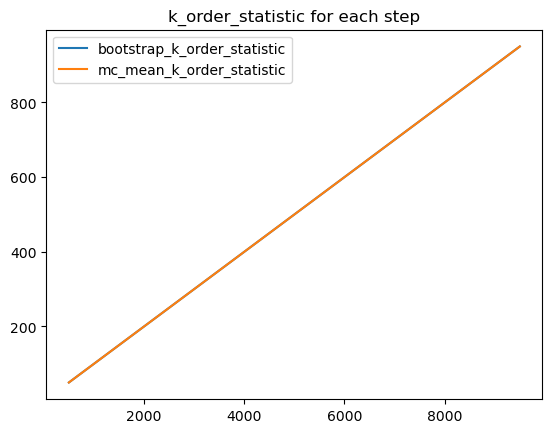

In [1]:
from main_functions import *

path_to_config = 'c:\\Users\\Antoine\\Desktop\\JupyterNotebooks\\bootstrap_extreme\\config_files\\'
run_config_file(path_to_config + "template_config_mc_vs_size_sample.json")
